# SPMKP

### Import Library

In [39]:
import mysql.connector as mysql
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import openpyxl

### Konek Database & Data

In [40]:
db_connection = mysql.connect(host = "10.4.19.15", 
                            database = 'mpninfo', 
                            user = 'indra', 
                            password= 'indra', 
                            port = 3306)

# READ FILE

In [41]:
mfwp = pd.read_excel('D:\DATA KANTOR\MASTERFILE\AFTER SMO 24MEI2021\Masterfile-007_sandingsidjp_Coro_per12Juli2021.xlsx',
usecols=['FULL','NAMA_WP','NAMA_KLU','NAMA_AR','SEKSI'], dtype={'FULL':'str','NAMA_KLU':'str'},engine = 'openpyxl')
kdmap = pd.read_excel('D:\DATA KANTOR\MASTERFILE\KODE_MAP_FILTERED.xlsx', engine='openpyxl', dtype={'KD MAP':'str'})

### QUERY

In [42]:
query = '''
SELECT * FROM SPMKP;
'''

### EXECUTE

In [43]:
spmkp = pd.read_sql(query, db_connection)
spmkp.tanggal = pd.to_datetime(spmkp.tanggal)
spmkp.head()

,id,admin,npwp,kpp,cabang,kdmap,bulan,tahun,tanggal,nominal
0,554233,007,029985629,007,000,411126,9,2021,2021-09-02,1.188115e+10
1,554232,007,029985629,007,000,411122,9,2021,2021-09-01,3.412000e+06
2,554231,007,029985629,007,000,411211,9,2021,2021-09-01,1.963000e+06
3,554230,007,032814675,008,000,411211,9,2021,2021-09-01,1.184180e+08
4,554229,007,752962001,005,000,411211,9,2021,2021-09-01,2.564932e+08


### ADD, DROP, URUTKAN

In [44]:
spmkp['NPWP_FULL']= spmkp.npwp + spmkp.kpp + spmkp.cabang
spmkp = spmkp.drop(['id','admin','npwp','kpp','cabang','bulan','tahun'], axis=1)
spmkp = spmkp[['NPWP_FULL','tanggal','kdmap','nominal']]
spmkp.head()

,NPWP_FULL,tanggal,kdmap,nominal
0,029985629007000,2021-09-02,411126,1.188115e+10
1,029985629007000,2021-09-01,411122,3.412000e+06
2,029985629007000,2021-09-01,411211,1.963000e+06
3,032814675008000,2021-09-01,411211,1.184180e+08
4,752962001005000,2021-09-01,411211,2.564932e+08


In [45]:
spmkp.dtypes

NPWP_FULL            object
tanggal      datetime64[ns]
kdmap                object
nominal             float64
dtype: object

# MERGE +MFWP

In [46]:
spmkp_ar = pd.merge(left=spmkp, right=mfwp,left_on='NPWP_FULL', right_on='FULL',how='left')
spmkp_ar.head()

,NPWP_FULL,tanggal,kdmap,nominal,FULL,NAMA_WP,NAMA_KLU,NAMA_AR,SEKSI
0,029985629007000,2021-09-02,411126,1.188115e+10,029985629007000,HAVI INDONESIA,PERDAGANGAN BESAR SUSU DAN PRODUK SUSU,Aldry Maralus Pangidoan Tambunan,Pengawasan I
1,029985629007000,2021-09-01,411122,3.412000e+06,029985629007000,HAVI INDONESIA,PERDAGANGAN BESAR SUSU DAN PRODUK SUSU,Aldry Maralus Pangidoan Tambunan,Pengawasan I
2,029985629007000,2021-09-01,411211,1.963000e+06,029985629007000,HAVI INDONESIA,PERDAGANGAN BESAR SUSU DAN PRODUK SUSU,Aldry Maralus Pangidoan Tambunan,Pengawasan I
3,032814675008000,2021-09-01,411211,1.184180e+08,032814675008000,UNGGUL SOKAJA,PERDAGANGAN BESAR ATAS DASAR BALAS JASA (FEE) ...,Novinasari Fanani,Pengawasan V
4,752962001005000,2021-09-01,411211,2.564932e+08,752962001005000,GUNA ROGATE INDAH,KONSTRUKSI GEDUNG LAINNYA,Novinasari Fanani,Pengawasan V


# MERGE +KDMAP

In [47]:
spmkp_ar = pd.merge(left=spmkp_ar, right=kdmap, left_on='kdmap', right_on='KD MAP', how = 'left')
spmkp_ar.head()

,NPWP_FULL,tanggal,kdmap,nominal,FULL,NAMA_WP,NAMA_KLU,NAMA_AR,SEKSI,KD MAP,KODE MAP
0,029985629007000,2021-09-02,411126,1.188115e+10,029985629007000,HAVI INDONESIA,PERDAGANGAN BESAR SUSU DAN PRODUK SUSU,Aldry Maralus Pangidoan Tambunan,Pengawasan I,411126,PPh 25 Badan
1,029985629007000,2021-09-01,411122,3.412000e+06,029985629007000,HAVI INDONESIA,PERDAGANGAN BESAR SUSU DAN PRODUK SUSU,Aldry Maralus Pangidoan Tambunan,Pengawasan I,411122,PPh 22
2,029985629007000,2021-09-01,411211,1.963000e+06,029985629007000,HAVI INDONESIA,PERDAGANGAN BESAR SUSU DAN PRODUK SUSU,Aldry Maralus Pangidoan Tambunan,Pengawasan I,411211,PPN DN
3,032814675008000,2021-09-01,411211,1.184180e+08,032814675008000,UNGGUL SOKAJA,PERDAGANGAN BESAR ATAS DASAR BALAS JASA (FEE) ...,Novinasari Fanani,Pengawasan V,411211,PPN DN
4,752962001005000,2021-09-01,411211,2.564932e+08,752962001005000,GUNA ROGATE INDAH,KONSTRUKSI GEDUNG LAINNYA,Novinasari Fanani,Pengawasan V,411211,PPN DN


# REDUCE DATA

In [48]:
spmkp_ar = spmkp_ar.drop(['NPWP_FULL'], axis=1)
spmkp_ar = spmkp_ar[['FULL','NAMA_WP','kdmap','tanggal','NAMA_AR','SEKSI','nominal']]
spmkp_ar.head()

,FULL,NAMA_WP,kdmap,tanggal,NAMA_AR,SEKSI,nominal
0,029985629007000,HAVI INDONESIA,411126,2021-09-02,Aldry Maralus Pangidoan Tambunan,Pengawasan I,1.188115e+10
1,029985629007000,HAVI INDONESIA,411122,2021-09-01,Aldry Maralus Pangidoan Tambunan,Pengawasan I,3.412000e+06
2,029985629007000,HAVI INDONESIA,411211,2021-09-01,Aldry Maralus Pangidoan Tambunan,Pengawasan I,1.963000e+06
3,032814675008000,UNGGUL SOKAJA,411211,2021-09-01,Novinasari Fanani,Pengawasan V,1.184180e+08
4,752962001005000,GUNA ROGATE INDAH,411211,2021-09-01,Novinasari Fanani,Pengawasan V,2.564932e+08


## SELEKSI

### 2021

In [52]:
spmkp_ar_2021 = spmkp_ar.loc[(spmkp_ar['tanggal']) >'2021-05-31']
spmkp_ar_2021.head()

,FULL,NAMA_WP,kdmap,tanggal,NAMA_AR,SEKSI,nominal
0,029985629007000,HAVI INDONESIA,411126,2021-09-02,Aldry Maralus Pangidoan Tambunan,Pengawasan I,1.188115e+10
1,029985629007000,HAVI INDONESIA,411122,2021-09-01,Aldry Maralus Pangidoan Tambunan,Pengawasan I,3.412000e+06
2,029985629007000,HAVI INDONESIA,411211,2021-09-01,Aldry Maralus Pangidoan Tambunan,Pengawasan I,1.963000e+06
3,032814675008000,UNGGUL SOKAJA,411211,2021-09-01,Novinasari Fanani,Pengawasan V,1.184180e+08
4,752962001005000,GUNA ROGATE INDAH,411211,2021-09-01,Novinasari Fanani,Pengawasan V,2.564932e+08


In [53]:
spmkp_ar_2021

,FULL,NAMA_WP,kdmap,tanggal,NAMA_AR,SEKSI,nominal
0,029985629007000,HAVI INDONESIA,411126,2021-09-02,Aldry Maralus Pangidoan Tambunan,Pengawasan I,1.188115e+10
1,029985629007000,HAVI INDONESIA,411122,2021-09-01,Aldry Maralus Pangidoan Tambunan,Pengawasan I,3.412000e+06
2,029985629007000,HAVI INDONESIA,411211,2021-09-01,Aldry Maralus Pangidoan Tambunan,Pengawasan I,1.963000e+06
3,032814675008000,UNGGUL SOKAJA,411211,2021-09-01,Novinasari Fanani,Pengawasan V,1.184180e+08
4,752962001005000,GUNA ROGATE INDAH,411211,2021-09-01,Novinasari Fanani,Pengawasan V,2.564932e+08
...,...,...,...,...,...,...,...
2732,033299553002000,MEDICA SUKSES ABADI,411211,2021-06-15,Sareh Pujiyanti,Pengawasan VI,1.357356e+09
2733,828162388005000,DARMASINDO PANDU PRATAMA,411122,2021-06-15,Dwi Haryanto,Pengawasan II,8.078000e+07
2734,029985298004000,KARYAWAN PT.ASTRA AGRO LESTARI,411126,2021-06-15,Donna Novita,Pengawasan I,1.241581e+08
2735,026492058005000,JAMPA INDOTAMA,411211,2021-06-09,Ramses,Pengawasan IV,3.620161e+09


In [58]:
spmkp_ar_2021.to_csv(r'D:\DATA KANTOR\MPN INFO\afterSMO\SPMKP\'SPMKPsmt22021.csv',index=False)

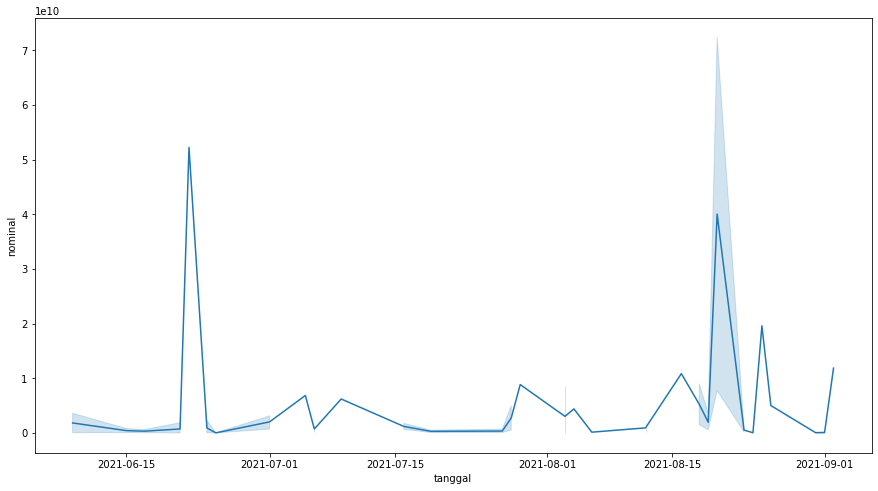

In [56]:
plt.figure(figsize=(15,8))
sb.lineplot(x= 'tanggal', y= 'nominal', data = spmkp_ar_2021);

In [ ]:
spmkp_ar_2021['bulan'] = spmkp_ar_2021.Tanggal.dt.month
spmkp_ar_2021.head()

<ipython-input-116-da6ac53f5300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spmkp_ar_2021['bulan'] = spmkp_ar_2021.Tanggal.dt.month


,Npwp_Full,Nama_WP,Kode_Klu,Status_WP,AR,Seksi,KDMAP,Tanggal,Nominal,bulan
0,013936174007000,USAHATAMA SENTOSA MAS,46492,Aktif,Aditya Rahadian,Waskon 3,PPh 25 Badan,2021-04-30,2.254413e+08,4
1,021102314007000,DAYA MITRA SERASI,78101,Aktif,Wihandy Novantiyono,Waskon 4,PPh 25 Badan,2021-04-30,6.682853e+08,4
2,010620482007000,PIPA MAS PUTIH,24103,Aktif,Pandan Candrawan,Waskon 2,PPh 25 Badan,2021-04-30,1.957928e+09,4
3,013629035007000,HARINA CHEMICALS INDT.,20123,Aktif,Donna Novita,Waskon 2,PPh 25 Badan,2021-04-28,1.105107e+09,4
4,025088980007000,SONIA IMPEX,46491,Aktif,Muhammad Sayuti,Waskon 3,PPh 22,2021-04-28,2.512000e+06,4


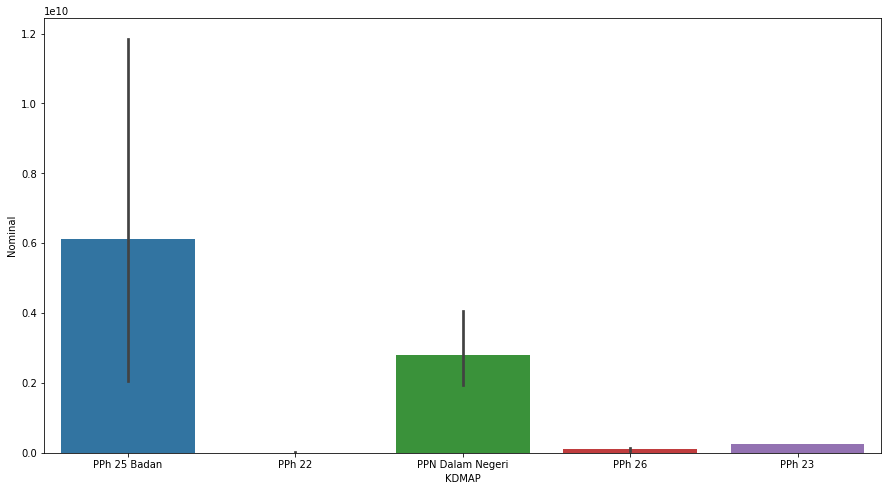

In [ ]:
plt.figure(figsize=(15,8))
sb.barplot(x='KDMAP', y='Nominal', data=spmkp_ar_2021);

In [ ]:
spmkp_ar.to_excel('D:\DATA KANTOR\JUPYTER NOTEBOOK\Export\SPMKP.xlsx',index=False)